### basic setting

In [1]:
#!pip install qgrid
#!jupyter nbextension enable --py --sys-prefix qgrid
#!pip install pandas

In [2]:
import math
from math import pi
import pandas as pd
# import qgrid
from copy import deepcopy
from collections import namedtuple
from functools import reduce
from functools import partial
import struct
# from ipywidgets import interact

In [3]:
#################################Module For Functional Programing#############################################
from functools import reduce
curry = lambda f: lambda a,*args: f(a, *args) if (len(args)) else lambda *args: f(a, *args)

filter = curry(filter)
map = curry(map)

def _take(length, iter):
    res = []
    for a in iter:
        res.append(a)
        if len(res) == length:
            return res
        
take = curry(_take)
reduce = curry(reduce)

go = lambda *args: reduce(lambda a,f: f(a), args) ## 함수도 축약 가능 ##
##############################################################################################################

In [4]:
def isinstance_namedtuple(obj) -> bool:
    return (
            isinstance(obj, tuple) and
            hasattr(obj, '_asdict') and
            hasattr(obj, '_fields')
    )

In [5]:
def put_data(data=None, **kwargs): # 기존 데이터로 부터 파생시키고 싶은 경우 첫째 인자로 네임드튜플 객체를 넣어준다.
    if isinstance_namedtuple(data):
        setMap = namedtuple('data', ",".join([*data._fields, *kwargs]))
        return setMap(*data, **kwargs)
    elif data != None:
        print("참조 데이터의 타입이 네임드튜플이 아닙니다.")
    else:
        setMap = namedtuple('data', ",".join([*kwargs]))
        return setMap(**kwargs)

    
### 기본 컨셉으로 키워드 인자를 사용하는 이유는 입력 인터페이스에서 직관성을 높이기 위한것임.
### 다양한 데이터를 동시입력해야하는 경우에는,
### kwargs(키워드 인자)의 사용보다는 리스트 자체를 입력받거나, 위치전용인수로 함수를 새로 만드는 것이 좋다.

# Required Strength of Rafter and Column

## Definition

### Information of Main Frame

#############################################
<b>Information of Main Frame Input 구간</b>
#############################################

In [6]:
def put_data_MainFrame(h, L, f, G, **kwargs):
    data = namedtuple('data_MainFrame', ",".join(['h, L, f, G', *kwargs]))
    
    return data(h, L, f, G, *kwargs)

In [7]:
data_MainFrame = put_data_MainFrame(

  ####### Building Height [m] #######
h = 6.025

, ####### span [m] #######
L = 20

, ####### Ridge Height [m] #######
f = 1.02

, ####### Column Grid Distance [m] #######
G = 8
    
)
data_MainFrame

data_MainFrame(h=6.025, L=20, f=1.02, G=8)

####################################################################################################################

In [8]:
def set_info_MainFrame(data, **kwargs):
    setInfo = namedtuple('info_MainFrame', ",".join(['h, L, f, G, s, θ', *kwargs]))
      ## roof beam length of one side
    s = (data.f**2+(data.L/2)**2)**0.5
    
      ## Roof Slope Degree
    θ = math.tanh(data.f/(data.L/2))*180/math.pi
    
    return setInfo(data.h, data.L, data.f, data.G, s, θ, **kwargs)

print(set_info_MainFrame(data_MainFrame))

info_mf = set_info_MainFrame(data_MainFrame)

info_MainFrame(h=6.025, L=20, f=1.02, G=8, s=10.051885395287792, θ=5.823985922332906)


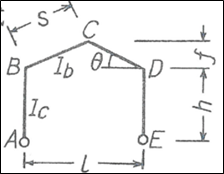

### Section Properties of H Shapes

#############################################
<b>Section Properties Input 구간</b>
#############################################

In [9]:
def put_data_SectionH(H,B,t1,t2,r, **kwargs):
    data = namedtuple('data_SectionH', ",".join(['H,B,t1,t2,r', *kwargs]))
    
    return data(H,B,t1,t2,r, **kwargs)

In [10]:
data_SectionH0 = put_data_SectionH(
    
    ####### Beam Height [mm] #######
H = 400
    
,   ####### Flange Width [mm] #######
B = 200
    
,   ####### Web thickness [mm] #######
t1 = 8
    
,   ####### Flange thickness [mm] #######
t2 = 12
    
,   ####### Root radius [m] #######
r = 0
    
)
data_SectionH0

data_SectionH(H=400, B=200, t1=8, t2=12, r=0)

####################################################################################################################

In [11]:
def set_info_SectionH(data=None, **kwargs):
    setInfo = namedtuple('info_SectionH', ",".join(['H, B, t1, t2, r, Ix', *kwargs]))
    
    Ix = (2*(data.B*data.t2**3/12+data.B*data.t2*((data.H-2*data.t2)/2+data.t2/2)**2)+data.t1*(data.H-2*data.t2)**3/12) 
    
    return setInfo(data.H, data.B, data.t1, data.t2, data.r, Ix, **kwargs)

print(set_info_SectionH(data_SectionH0))

info_SectionH(H=400, B=200, t1=8, t2=12, r=0, Ix=216148650.66666666)


In [12]:
info_SectionH_col = set_info_SectionH(deepcopy(data_SectionH0))
info_SectionH_beam = set_info_SectionH(deepcopy(data_SectionH0))

### Dead and Live Load

#############################################
<b>Dead/Live Load Input 구간</b>
#############################################

In [13]:
data_deadLive = put_data(
################################################################

    ## Roof Dead [kN/m2]
roof_dead = 0.4
,   ## Roof Live [kN/m2]
roof_live = 0.6

################################################################
)

####################################################################################################################

### Wind Load

#############################################
<b>Wind Load Input 구간</b>
#############################################

In [14]:
# put_data_windCondtion = \
# lambda data, gust_factor_G, wind_pressure_q:\
#     put_data(data, gust_factor_G=None, wind_pressure_q=None)

In [15]:
# put_data_windCondtion(data_deadLive, gust_factor_G = 0.85, wind_pressure_q = 1.5)

In [16]:
data_windCondition = put_data(data_deadLive,
################################################################
                     
    ## gust_factor_G
gust_factor_G = 0.85
,   ## wind_pressure_q
wind_pressure_q = 1.5

,   ## Site Exposure
site_exposure = "D"
,   ## Basice Wind Speed
basic_wind_speed = 51.6
,   ## Kz (Velocity Pressure Exposure Coefficients)
Kz = 1.08
,   ## Wind Speed at Site (Roof Eave Height, Site Exposure)
wind_speed_site = 54

################################################################
)

In [17]:
data_windCondition

data(roof_dead=0.4, roof_live=0.6, gust_factor_G=0.85, wind_pressure_q=1.5, site_exposure='D', basic_wind_speed=51.6, Kz=1.08, wind_speed_site=54)

####################################################################################################################

In [18]:
def set_info_windCoef(data, wall_w_Cp, wall_l_Cp, roof_w_Cp, roof_l_Cp):
    setInfo_0 = namedtuple('map', 'Cp, WindLoad')
    setInfo_1 = namedtuple('map', 'Windward, Leeward')
    setInfo_3 = namedtuple('map', 'Wall, Roof')
    setInfo = namedtuple('info_wind', 'windCondition, windExtCp')
    
    Gust_G = data.gust_factor_G
    WindPressure = data.wind_pressure_q
    
    wall_windward = setInfo_0(wall_w_Cp, Gust_G*WindPressure*wall_w_Cp)
    wall_leeward = setInfo_0(wall_l_Cp, Gust_G*WindPressure*wall_l_Cp)
    roof_windward = setInfo_0(roof_w_Cp, Gust_G*WindPressure*roof_w_Cp)
    roof_leeward = setInfo_0(roof_l_Cp, Gust_G*WindPressure*roof_l_Cp)
    
    wall = setInfo_1(wall_windward, wall_leeward)
    roof = setInfo_1(roof_windward, roof_leeward)
    
    total = setInfo_3(wall, roof)
    
    return setInfo(data, total)

In [19]:
info_wf = set_info_windCoef(data_windCondition, 

    ## set wind External Pressure Coefficient
0.8, -0.5, -0.7, -0.7
                           
)

info_wf.windCondition

data(roof_dead=0.4, roof_live=0.6, gust_factor_G=0.85, wind_pressure_q=1.5, site_exposure='D', basic_wind_speed=51.6, Kz=1.08, wind_speed_site=54)

In [20]:
info_wf

info_wind(windCondition=data(roof_dead=0.4, roof_live=0.6, gust_factor_G=0.85, wind_pressure_q=1.5, site_exposure='D', basic_wind_speed=51.6, Kz=1.08, wind_speed_site=54), windExtCp=map(Wall=map(Windward=map(Cp=0.8, WindLoad=1.02), Leeward=map(Cp=-0.5, WindLoad=-0.6375)), Roof=map(Windward=map(Cp=-0.7, WindLoad=-0.8924999999999998), Leeward=map(Cp=-0.7, WindLoad=-0.8924999999999998))))

In [21]:
def set_info_Load(info_mf, info_wf, info_SectionH_col, info_SectionH_beam):
    setInfo = namedtuple('info_windLoad', 'w_D, w_L, k, α, N')
    
    w_D = info_wf.windCondition.roof_dead * info_mf.G
    w_L = info_wf.windCondition.roof_live * info_mf.G
    Ix_col = info_SectionH_col.Ix
    Ix_beam = info_SectionH_beam.Ix
    k = (Ix_beam/Ix_col)*(info_mf.h/info_mf.s)  ## 모멘트분배에 대한 내용일 것으로 추정
    α = info_mf.h**2 * (k+3) + info_mf.f*(3*info_mf.h+info_mf.f)
    N = (k*info_mf.h + info_mf.f)**2 + 4*k*(info_mf.h**2 + info_mf.h*info_mf.f + info_mf.f**2)
    
    return setInfo(w_D, w_L, k, α, N)

In [22]:
info_wl = set_info_Load(info_mf, info_wf, info_SectionH_col, info_SectionH_beam)
info_wl

info_windLoad(w_D=3.2, w_L=4.8, k=0.5993900410787065, α=150.13700810993274, N=125.71073125694183)

### Required Strength for Dead Load

In [23]:
def set_info_RS_DL(info_mf, info_wl, x):
    w_D = info_wl.w_D
    L   = info_mf.L
    h   = info_mf.h
    f   = info_mf.f
    θ   = info_mf.θ
    α   = info_wl.α
    
    setInfo = namedtuple('rs_DL', 'Va, Ve, Ha, H, He, Mb, Mc, Md, Mx')
    Va = Ve = w_D*L/2
    H = Ha = ( (w_D*L**2)/32 ) * ( (8*h + 5*f)/α )
    He = -Ha
    Mb = Md = -H * h
    Mc = ( (w_D*L**2)/8 ) - ( H*(h + f) )
    Mx = ( Va*x ) - ( Ha*(h + 2*f*x/L)) - ( (w_D*x**2)/2 )
    
    return setInfo(Va, Ve, Ha, H, He, Mb, Mc, Md, Mx)

In [24]:
# info_rsDL = set_info_RS_DL(info_mf, info_wl, x=0)
# print(set_info_RS_DL(info_mf, info_wl, x=0))

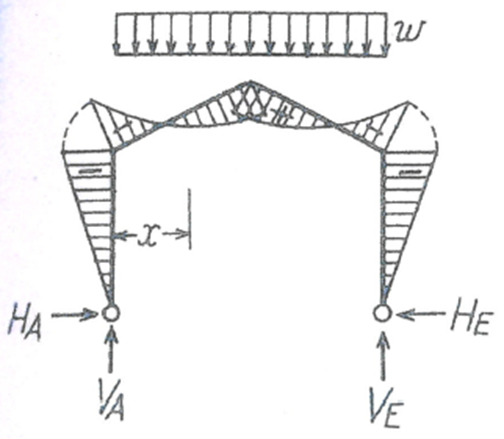
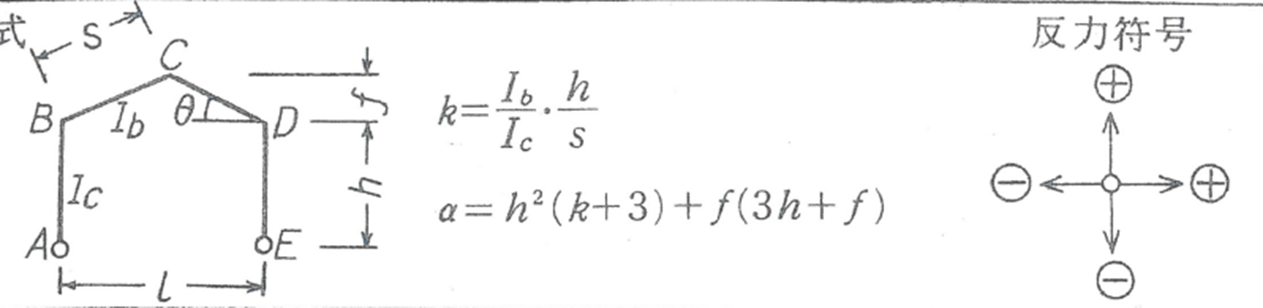

### Required Strength for Live Load

In [25]:
def set_info_RS_LL(info_mf, info_wf, info_wl, x):
    w_L = info_wl.w_L
    L = info_mf.L
    h = info_mf.h
    f = info_mf.f
    G = info_mf.G
    θ = info_mf.θ
    α = info_wl.α
    
    
    setInfo = namedtuple('rs_LL', 'Va, Ve, Ha, H, He, Mb, Mc, Md, Mx, w1, w2v, w3v, w2h, w3h, w4')
    Va = Ve = w_L*L/2
    H = Ha = ( (w_L*L**2)/32 ) * ( (8*h + 5*f)/α )
    He = -Ha
    Mb = Md = -H * h
    Mc = ( (w_L*L**2)/8 ) - ( H*(h + f) )
    Mx = ( Va*x ) - ( Ha*(h + 2*f*x/L)) - ( (w_L*x**2)/2 )
    
    w1 = info_wf.windExtCp.Wall.Windward.WindLoad * G    # Wall Windward
    w2v = info_wf.windExtCp.Roof.Windward.WindLoad * G * math.cos(θ*pi/180) * -1
    w3v = info_wf.windExtCp.Roof.Leeward.WindLoad * G * math.cos(θ*pi/180) * -1
    w2h = info_wf.windExtCp.Roof.Windward.WindLoad * G * math.sin(θ*pi/180) * -1
    w3h = info_wf.windExtCp.Roof.Leeward.WindLoad * G * math.sin(θ*pi/180) * -1
    w4 = info_wf.windExtCp.Wall.Leeward.WindLoad * G * -1
    
    return setInfo(Va, Ve, Ha, H, He, Mb, Mc, Md, Mx, w1, w2v, w3v, w2h, w3h, w4)

In [26]:
# info_rsLL = set_info_RS_LL(info_mf, info_wl, x=10)
# print(set_info_RS_LL(info_mf, info_wl, x=10))

### Required Strength for Wind Load

In [27]:
def set_info_RS_WL(info_mf, info_wl, info_rsLL):
    h = info_mf.h
    L = info_mf.L
    f = info_mf.f
    s = info_mf.s
    k = info_wl.k
    α = info_wl.α
    
    [w1, w2v, w3v, w2h, w3h, w4] = [info_rsLL.w1, info_rsLL.w2v, info_rsLL.w3v, info_rsLL.w2h, info_rsLL.w3h, info_rsLL.w4]
    
    setInfo = namedtuple('rs_WL', 'Va14,Ve14,Ha14,He14,Va23h,Ve23h,Ha23h,He23h,Va2v,Ve2v,Ha2v,He2v,Ve3v,Va3v,He3v,Ha3v, Va,Ve,Ha,He, Mb,Mc,Md')
    
    Va14 = -(h**2)/(2*L) * (w1 + w4)
    Ve14 = -Va14
    Ha14 = -w1*h + ((5*h*k) + 6*(2*h+f))/(16*α) * (h**2) * (w1 - w4)
    He14 = -w4*h - ((5*h*k) + 6*(2*h+f))/(16*α) * (h**2) * (w1 - w4)
    Va23h = (f*(2*h+f))/(2*L) * (w2h - w3h)
    Ve23h = -Va23h
    Ha23h = (w2h * f) - ((8*h**2*(k+3) + 5*f*(4*h+f))/(16*α))*f*(w2h + w3h)
    He23h = -(w3h * f) + ((8*h**2*(k+3) + 5*f*(4*h+f))/(16*α))*f*(w2h + w3h)
    Va2v = -(3*w2v*L)/8
    Ve2v = -(w2v*L)/8
    Ha2v = ((-w2v*L**2)/64)*((8*h+5*f)/α)
    He2v = -Ha2v
    Ve3v = -(3*w3v*L)/8
    Va3v = -(w3v*L)/8
    He3v = ((w3v*L**2)/64)*((8*h+5*f)/α)
    Ha3v = -He3v
    
    Va = Va14 + Va23h + Va2v + Va3v
    Ve = Ve14 + Ve23h + Ve2v + Ve3v
    Ha = Ha14 + Ha23h + Ha2v + Ha3v
    He = He14 + He23h + He2v + He3v
    
    Mb = -Ha*h - (w1*h**2)/2
    Mc = -Ha*(h+f) + (Va*L)/2 - w1*h*(h/2+f) + (w2v*s**2)/2
    Md = He*h + (w4*h**2)/2
    
    return setInfo(Va14,Ve14,Ha14,He14,Va23h,Ve23h,Ha23h,He23h,Va2v,Ve2v,Ha2v,He2v,Ve3v,Va3v,He3v,Ha3v, Va,Ve,Ha,He, Mb,Mc,Md)

In [28]:
# info_rsWL = set_info_RS_WL(info_mf, info_wl, info_rsLL)
# print(set_info_RS_WL(info_mf, info_wl, info_rsLL))

In [29]:
def get_df_RS_RafterAndColumn(info_rsDL, info_rsLL, info_rsWL):
    setInfo = namedtuple('dt', 'A_P, A_M, B_M, C_M, D_M, E_P, E_M')
    
    dead = setInfo(-info_rsDL.Va, 0, info_rsDL.Mb, info_rsDL.Mc, info_rsDL.Md, -info_rsDL.Ve, 0)
    live = setInfo(-info_rsLL.Va, 0, info_rsLL.Mb, info_rsLL.Mc, info_rsLL.Md, -info_rsLL.Ve, 0)
    wind = setInfo(-info_rsWL.Va, 0, info_rsWL.Mb, info_rsWL.Mc, info_rsWL.Md, -info_rsWL.Ve, 0)
    
    combi1 = setInfo(1.2*dead.A_P+1.6*live.A_P, 1.2*dead.A_M+1.6*live.A_M, 
                     1.2*dead.B_M+1.6*live.B_M, 
                     1.2*dead.C_M+1.6*live.C_M, 
                     1.2*dead.D_M+1.6*live.D_M, 
                     1.2*dead.E_P+1.6*live.E_P, 1.2*dead.E_M+1.6*live.E_M)
    
    combi2 = setInfo(1.2*dead.A_P+1.6*live.A_P+0.8*wind.A_P, 1.2*dead.A_M+1.6*live.A_M+0.8*wind.A_M, 
                     1.2*dead.B_M+1.6*live.B_M+0.8*wind.B_M, 
                     1.2*dead.C_M+1.6*live.C_M+0.8*wind.C_M, 
                     1.2*dead.D_M+1.6*live.D_M+0.8*wind.D_M, 
                     1.2*dead.E_P+1.6*live.E_P+0.8*wind.E_P, 1.2*dead.E_M+1.6*live.E_M+0.8*wind.E_M)
    
    combi3 = setInfo(0.9*dead.A_P+1.6*wind.A_P, 0.9*dead.A_M+1.6*wind.A_M, 
                     0.9*dead.B_M+1.6*wind.B_M, 
                     0.9*dead.C_M+1.6*wind.C_M, 
                     0.9*dead.D_M+1.6*wind.D_M, 
                     0.9*dead.E_P+1.6*wind.E_P, 0.9*dead.E_M+1.6*wind.E_M)
    
    df = pd.DataFrame([dead, live, wind, combi1, combi2, combi3],
                     columns= [['A','A','B','C','D','E','E'],['P','M','M','M','M','P','M']])
    df.insert(0, 'Load Case', ['DEAD(D)','LIVE(L)','WIND(W)','1.2D+1.6L','1.2D+1.6L+0.8W','0.9D+1.6W'])
    
    return df

In [30]:
# df=get_df_RS_RafterAndColumn(info_rsDL, info_rsLL, info_rsWL)
# df

## Use

### User Input

#############################################
<b>Information of Main Frame Input 구간</b>
#############################################

In [31]:
data_MainFrame = put_data_MainFrame(

  ####### Building Height [m] #######
h = 6.025

, ####### span [m] #######
L = 20

, ####### Ridge Height [m] #######
f = 1.02

, ####### Column Grid Distance [m] #######
G = 8
    
)
data_MainFrame

data_MainFrame(h=6.025, L=20, f=1.02, G=8)

#############################################
<b>Section Properties Input 구간</b>
#############################################

In [32]:
data_SectionH0 = put_data_SectionH(
    
    ####### Beam Height [mm] #######
H = 400
    
,   ####### Flange Width [mm] #######
B = 200
    
,   ####### Web thickness [mm] #######
t1 = 8
    
,   ####### Flange thickness [mm] #######
t2 = 12
    
,   ####### Root radius [m] #######
r = 0
    
)
data_SectionH0
data_SectionH1 = deepcopy(data_SectionH0)

#############################################
<b>Dead/Live Load Input 구간</b>
#############################################

In [33]:
data_deadLive = put_data(
################################################################

    ## Roof Dead [kN/m2]
roof_dead = 0.4
,   ## Roof Live [kN/m2]
roof_live = 0.6

################################################################
)
data_deadLive

data(roof_dead=0.4, roof_live=0.6)

#############################################
<b>Wind Load Input 구간</b>
#############################################

In [34]:
data_windCondition = put_data(data_deadLive,
################################################################
                     
    ## gust_factor_G
gust_factor_G = 0.85
,   ## wind_pressure_q
wind_pressure_q = 1.5

,   ## Site Exposure
site_exposure = "D"
,   ## Basice Wind Speed
basic_wind_speed = 51.6
,   ## Kz (Velocity Pressure Exposure Coefficients)
Kz = 1.08
,   ## Wind Speed at Site (Roof Eave Height, Site Exposure)
wind_speed_site = 54

################################################################
)

####################################################################################################################

####################################################################################################################

####################################################################################################################

### Result

In [35]:
info_mf = set_info_MainFrame(data_MainFrame)

info_SectionH_col = set_info_SectionH(data_SectionH0)
info_SectionH_beam = set_info_SectionH(data_SectionH1)

info_wf = set_info_windCoef(data_windCondition, 
    ## set wind External Pressure Coefficient
0.8, -0.5, -0.7, -0.7                         
)
info_wl = set_info_Load(info_mf, info_wf, info_SectionH_col, info_SectionH_beam)

info_rsDL = set_info_RS_DL(info_mf, info_wl, x=0)
info_rsLL = set_info_RS_LL(info_mf, info_wf, info_wl, x=10)
info_rsWL = set_info_RS_WL(info_mf, info_wl, info_rsLL)

df=get_df_RS_RafterAndColumn(info_rsDL, info_rsLL, info_rsWL)

In [36]:
df  ## Unit-kN. M

Load Case           A                B           C           D  \
                            P    M           M           M           M   
0         DEAD(D)  -32.000000  0.0  -85.557186   59.958443  -85.557186   
1         LIVE(L)  -48.000000  0.0 -128.335780   89.937665 -128.335780   
2         WIND(W)   83.065113  0.0  311.039344 -133.175807   70.366201   
3       1.2D+1.6L -115.200000  0.0 -308.005871  215.850396 -308.005871   
4  1.2D+1.6L+0.8W  -48.747910  0.0  -59.174396  109.309751 -251.712911   
5       0.9D+1.6W  104.104181  0.0  420.661483 -159.118692   35.584453   

            E       
            P    M  
0  -32.000000  0.0  
1  -48.000000  0.0  
2   58.997799  0.0  
3 -115.200000  0.0  
4  -68.001761  0.0  
5   65.596478  0.0

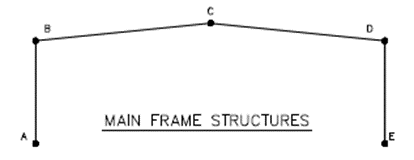

---

---

---